In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
bias = 200
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

In [3]:
X.shape, y.shape

((100, 1), (100,))

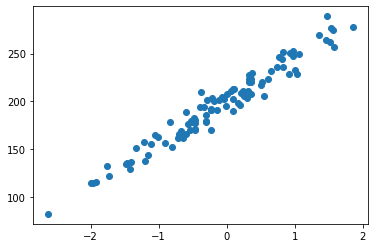

In [4]:
plt.scatter(X,y)

y = mx + c, m = coef, c = bias

In [5]:
coef, bias

(array(41.74110031), 200)

In [6]:
y_gen = X * coef + bias

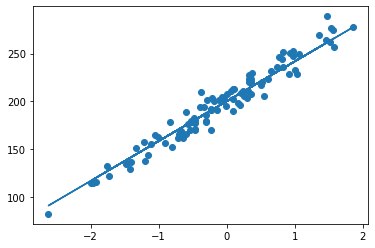

In [7]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([44.43716999]), 201.16511532052695)

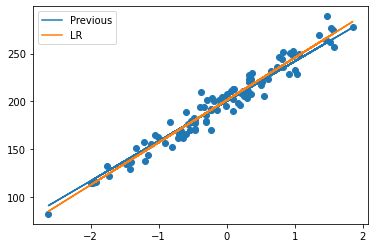

In [12]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Previous")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

## Custom Linear Regression Implementation

In [13]:
class LinearRegressionCustom:
    
    def __init__(self, lr=0.1):
        self.lr = lr
    
    def fit(self, X , y):
        self._X = X
        self._y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        
        for i in range(50):
            self.gradient_descent()
            errors.append(self.error())
        return errors
    
    def gradient_descent(self):
            d_coef, d_intercept = self.gradient()
            self.coef_ -= d_coef * self.lr
            self.intercept_ -= d_intercept * self.lr
            
    def gradient(self):
        yh = self.predict(self._X)
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [14]:
model = LinearRegressionCustom(lr=0.1)

In [15]:
errors = model.fit(X, y)

In [16]:
model.coef_, model.intercept_

(42.74451324383692, 199.6616287544444)

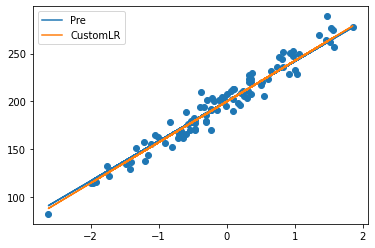

In [17]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CustomLR")
plt.legend()

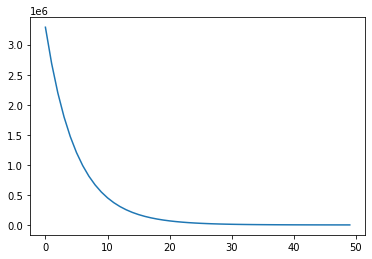

In [18]:
plt.plot(errors)